## Problem 4.1

1024 pixels (32 times 32) + 20 firing rates = 1044 variables in total:

$[x_{1,1}, x_{1,2}, ..., x_{32,32}, z_1, ..., z_{20}]$

## Problem 4.2

3 neurons x 1000 time bins per neuron = 3000 variables in total:

$[z_{1,1}, ..., z_{1,1000}, z_{2,1}, ..., z_{2,1000}, z_{3,1}, ..., z_{3,1000}]$

## Problem 4.3

(3 neurons x 1000 time bins per neuron) + (2 behaviors x 1000 time bins per behavior) = 3000 + 2000 = 5000 variables in total.

$[z_{1,1}, ..., z_{1,1000}, z_{2,1}, ..., z_{2,1000}, z_{3,1}, ..., z_{3,1000}, y_{1,1}, ..., y_{1,1000}, y_{2,1}, ..., y_{2,1000}]$

## Problem 4.4

10 channels x 5 seconds x 2000 samples/second = 100,000. (The movie is not random).

$[z_{1,1}, ..., z_{1,10000}, z_{2,1}, ..., z_{2,10000}, ..., z_{10,1}, ..., z_{10,10000}]$

## Problem 4.5

10 channels time-averaged = 10.

$[z_{1}, ..., z_{10}]$

## Problem 4.6

100,000 + 5 seconds x 30 fps x 1280 x 720 = 138340000

Wow!

## Problem 4.7

Since every neuron connects to every other neuron, the connectivity is given by an N x N matrix, i.e. $N^2$ total values

## Problem 4.8

The original data is an $N \times T$ matrix, so when we average over $T$ we're left with $N$ numbers.

## Problem 5.1
$P(A=2, B=3) = 0.04$

## Problem 5.2
$P(A = 1) = \sum_j P(A = 1, B = b_j)$

$= P(A=1, B=0) + P(A=1, B=1) + P(A=1, B=2) + P(A=1, B=3)$

$= .1 + .07 +.04 +.1 = .31$

## Problem 5.3
$E[A] = 0*P(A=0) + 1*P(A=1) + 2*P(A=2) + 3*P(A=3)$

$= 0 + 1*.31 + 2*.22 + 3*.22 = 1.41$

## Problem 5.4

$E[B] = 0*P(B=0) + 1*P(B=1) + 2*P(B=2) + 3*P(B=3)$

$ = 0 + 1*.22 + 2*.31 + 3*.25 = 1.59$

## Problem 5.5

$E[[A,B]] = [0, 0]*P(A=0, B=0) + [1, 0]*P(A=1, B=0)$

$+ [2, 0]*P(A=2, B=0) + ... + [3, 3]*P(A=3, B=3)$

$= [1.41, 1.59]$

$= [E[A], E[B]]$

## Problem 5.6

$Cov[A, B] = E[(A-E[A])(B-E[B])] = E[(A-1.41)(B-1.59)]$

$= \sum_{i,j} (a_i - 1.41)(b_j - 1.59)p(A=a_i, B=b_j)$

## Problem 5.7

$Cov[A, B] = (0-1.41)(0-1.59)(.04) + (1-1.41)(0-1.59)(.1) + ... + (3-1.41)(3-1.59)(.04)$

$=-.0519$

In [123]:
p_ab = np.array([
    [.04, .1, .04, .04],
    [.04, .07, .07, .04],
    [.1, .04, .07, .1],
    [.07, .1, .04, .04],
])

cov = 0

for j in range(4):
    for i in range(4):
        cov += (j - 1.41)*(i - 1.59)*p_ab[i, j]
        
cov

-0.05189999999999996

## Problem 5.8
$$Corr[A, B] = \frac{Cov[A, B]}{\sqrt{Var[A]Var[B]}}$$

$Var[A] = \sum_i(a_i - 1.41)^2p(A=a_i)$

$= (0-1.41)^2(.25) + (1-1.41)^2(.31) + (2-1.41)^2(.22) + (3-1.41)^2(.22)$

$=1.1819$

$Var[B] = \sum_j(b_j-1.59)^2p(B=b_j)$

$=(0-1.59)^2(.22) + (1-1.59)^2(.22) + (2-1.59)^2(.31) + (3-1.59)^2(.25)$

$=1.1819$

$Corr[A, B] = -.0519/1.1819 \approx -.0439$

## Problem 5.9

No. $p(A, B) \neq p(A)p(B)$

E.g. $p(A=0)p(B=0) = (.25)(.22) = .055 \neq .04$

In [14]:
import numpy as np

p_ab = np.array([
    [.04, .1, .04, .04],
    [.04, .07, .07, .04],
    [.1, .04, .07, .1],
    [.07, .1, .04, .04],
])

mean = np.array([0. ,0])
for a_ctr, a in enumerate(range(4)):
    for b_ctr, b in enumerate(range(4)):
        mean += np.array([a, b])*p_ab[a_ctr, b_ctr]
        
mean

cov = 0

for a_ctr, a in enumerate(range(4)):
    for b_ctr, b in enumerate(range(4)):
        cov += (a - 1.41)*(b - 1.59)*p_ab[a_ctr, b_ctr]
        
cov

-0.08430000000000006

In [15]:
p_a = p_ab.sum(0)
p_b = p_ab.sum(1)

np.dot(p_b[:, None], p_a[None, :])

array([[0.055 , 0.0682, 0.0484, 0.0484],
       [0.055 , 0.0682, 0.0484, 0.0484],
       [0.0775, 0.0961, 0.0682, 0.0682],
       [0.0625, 0.0775, 0.055 , 0.055 ]])

In [19]:
np.dot((np.arange(4)-1.59)**2, p_b)

1.1819000000000002

In [21]:
p_a

array([0.25, 0.31, 0.22, 0.22])

In [22]:
p_b

array([0.22, 0.22, 0.31, 0.25])

In [23]:
.25*.22

0.055

## Problem 6.1

50 elements (every sample is a 50-element vector, so an average over the random process is also a 50-element vector).

## Problem 6.2

$$Cov[X, Y] = E[(X-E[X])(Y-E[Y])]$$

$$ =\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-E[X])(y-E[Y])P(x, y)dxdy$$

## Problem 6.3

1024 x 1024. Each row or column corresponds to 1 pixel. Each element corresponds to one pair of pixels.

## Problem 6.4

$$\hat\mu_i = \frac{1}{N}\sum_{a=1}^N x^i_a$$

$$\hat{K}_{i,j} = \frac{1}{N-1}\sum_{a=1}^N (x^i_a-E[X^i])(x^j_a-E[Y^j]) $$

In [13]:
import numpy as np

N = 50
T = 300

np.random.seed(0)

x_1 = np.random.normal(10, 1, T)[:, None]
x_2 = np.random.normal(10, 1, T)[:, None]
x_3 = np.random.normal(10, 1, T)[:, None]

a = np.linspace(0, 1, N)
y_1 = np.exp(-((a-.1)**2)/.05)[None, :]
y_2 = np.exp(-((a-.3)**2)/.05)[None, :]
y_3 = np.exp(-((a-.8)**2)/.05)[None, :]

X = x_1.dot(y_1) + x_2.dot(y_2) + x_3.dot(y_3)
X += np.random.normal(0, .5, X.shape)

np.save('firing_rates.npy', np.array([{'data': X}]))

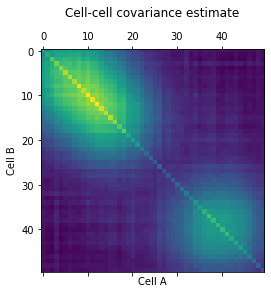

In [15]:
%matplotlib inline
%reset -f
import matplotlib.pyplot as plt
import numpy as np

X = np.load('firing_rates.npy', allow_pickle=True)[0]['data']

T = X.shape[0]
N = X.shape[1]

mu = np.mean(X, 0)
K = np.nan * np.zeros((N, N))

for i in range(N):
    for j in range(N):
        K[i, j] = (1/(N-1)) * np.sum((X[:, i] - mu[i])*(X[:, j] - mu[j]))
        
plt.matshow(K)
plt.xlabel('Cell A')
plt.ylabel('Cell B')
plt.title('Cell-cell covariance estimate\n');

## Problem 7.1

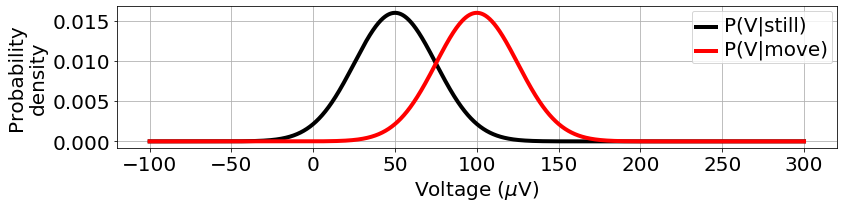

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from disp import set_font_size


v = np.linspace(-100, 300, 5000)
p_v_still = (1/np.sqrt(2*np.pi*(25**2))) * np.exp(-.5*((v - 50)**2)/(25**2))
p_v_move = (1/np.sqrt(2*np.pi*(25**2))) * np.exp(-.5*((v - 100)**2)/(25**2))

fig, ax = plt.subplots(1, 1, figsize=(12, 3), tight_layout=True)
ax.plot(v, p_v_still, color='k', lw=4)
ax.plot(v, p_v_move, color='r', lw=4)

ax.set_xlabel('Voltage ($\mu$V)')
ax.set_ylabel('Probability\ndensity')

ax.legend(['P(V|still)', 'P(V|move)'])
ax.grid()

set_font_size(ax, 20)

We want to find $P(move|V)$ for $V = 75\mu V$ and $V = 100 \mu V$.

We know:

$$P(move) = 0.1$$

$$P(still) = 1 - P(move) = .9$$

$$P(V|still) = \frac{1}{\sqrt{2\pi (25 \mu V)^2}}\exp\left(-\frac{1}{2}\frac{(V - 50 \mu V)^2}{(25 \mu V)^2}\right)$$

$$P(V|move) = \frac{1}{\sqrt{2\pi (25 \mu V)^2}}\exp\left(-\frac{1}{2}\frac{(V - 100 \mu V)^2}{(25 \mu V)^2}\right)$$

Using Bayes' theorem:

$$P(move|V = 75\mu V) = \frac{P(V = 75 \mu V|move)P(move)}{P(V = 75 \mu V)}$$

$$P(V = 75 \mu V) = P(V = 75 \mu V|move)P(move) + P(V = 75 \mu V|still)P(still)$$

$$\approx (.01/\mu V)(.1) + (.01/\mu V)(.9) = .01/\mu V$$

$$P(move|V = 75 \mu V) = \frac{.01 \times .1}{.01} = .1$$

$$P(move|V = 100\mu V) = \frac{P(V = 100 \mu V|move)P(move)}{P(V = 100 \mu V)}$$

$$P(V = 100 \mu V) = P(V = 100 \mu V|move)P(move) + P(V = 100 \mu V|still)P(still)$$

$$\approx .016(.1) + .002(.9) = .0034$$

$$P(move|V = 100\mu V) = \frac{P(V = 100 \mu V|move)P(move)}{P(V = 100 \mu V)}$$

$$=\frac{.016(.1)}{.0034} \approx .47$$

In [33]:
# p(V = 75 uV|move)
(1/np.sqrt(2*np.pi*(25**2))) * np.exp(-.5*((75 - 100)**2)/(25**2))

0.009678828980765735

In [34]:
# p(V = 75 uV|still)
(1/np.sqrt(2*np.pi*(25**2))) * np.exp(-.5*((75 - 50)**2)/(25**2))

0.009678828980765735

In [36]:
# p(V = 100 uV|move)
(1/np.sqrt(2*np.pi*(25**2))) * np.exp(-.5*((100 - 100)**2)/(25**2))

0.015957691216057307

In [37]:
# p(V = 100 uV|still)
(1/np.sqrt(2*np.pi*(25**2))) * np.exp(-.5*((100 - 50)**2)/(25**2))

0.002159638660527522

## Problem 7.2

We want $P(cat|spike)$. We know:

$P(spike|cat) = .8$

$P(spike|dog) = .2$

$P(cat) = .25$

$P(dog) = .75$.


Using Bayes' Law:

$$P(cat|spike) = \frac{P(spike|cat)P(cat)}{P(spike)}$$

To solve, we still need $P(spike)$:

$P(spike) = P(spike|cat)P(cat) + P(spike|dog)P(dog)$

$=.8*.25 + .2*.75 = .35$

So $$P(cat|spike) = \frac{.8(.25)}{.35} \approx .57 $$

When $P(cat) = P(dog) = 0.5$:

$P(spike) = .8*.5 + .2*.5 = .5$

So $P(cat|spike) = \frac{.8(.5)}{.5} = .8$

## Problem 8.1

A: Positive. B: near zero. C: near zero.

## Problem 8.2

A: Positive. B: negative. C: Positive.

## Problem 8.3

$$X_t = .9X_{t-1} + \eta$$

$$\eta \sim Gaussian(0, 1); X_0 = 0$$

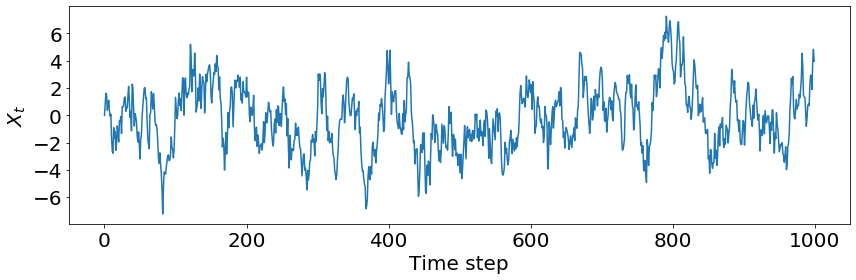

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from disp import set_font_size

N = 100
T = 1000

ts = np.arange(T)
xs = np.nan * np.zeros((N, T))
xs[:, 0] = 0

for i in range(N):
    for t in range(1, T):
        xs[i, t] = .9*xs[i, t-1] + np.random.normal(0, 1)
    
fig, ax = plt.subplots(1, 1, figsize=(12, 4), tight_layout=True)
ax.plot(ts, xs[0])
ax.set_xlabel('Time step')
ax.set_ylabel('$X_t$')

set_font_size(ax, 20)

Calculate autocovariance function

In [79]:
# sweep over delta t
dts = np.arange(-200, 200)
cov = np.nan * np.zeros(dts.shape)

for dt_ctr, dt in enumerate(dts):
    # get ensemble of pairs of values
    x_1 = []
    x_2 = []
    
    for t_1 in range(T):
        t_2 = t_1 + dt
        if 0 <= t_2 < T:
            x_1.append(xs[:, t_1])
            x_2.append(xs[:, t_2])
            
    x_1 = np.concatenate(x_1)
    x_2 = np.concatenate(x_2)
    
    cov[dt_ctr] = np.cov(np.array([x_1, x_2]))[0, 1]

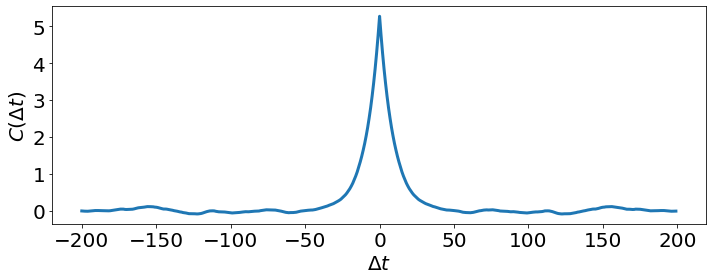

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4), tight_layout=True)
ax.plot(dts, cov, lw=3)
ax.set_xlabel('$\Delta t$')
ax.set_ylabel('$C(\Delta t)$')

set_font_size(ax, 20)

## Problem 9.1

$$H[X] = -\sum_i p(x_i) \ln(p(x_i)) = -\sum_i 1/N \ln(1/N) = -N/N\ln(1/N) = -\ln(1/N) = \ln(N)$$

## Problem 9.2

Left: $H[X] = -(.3\ln.3 + .3\ln.3 + .2\ln.2 + .2\ln.2) \approx 1.366$

Middle: $H[X] = -(.4\ln.4 + .4\ln.4 + .1\ln.1 + .1\ln.1) \approx 1.19355$

Right: $H[X] \approx 1.19355$

Note: Entropy of a probability mass function does not depend on the values of $X$, only on their probabilities. 

## Problem 9.3

Coin flip, die roll, random word, random sequence.

## Problem 9.4

Summer day, random day in Muiz, random day in random city.

## Problem 9.5

Spike count of 1 neuron, spike count of N interconnected neurons, spike count of N independent neurons.

## Problem 9.6

Entropy of just $P(X_1)$.

$H[X_1] = -\sum_i P(X_1 = x_1^i) \ln P(X_1 = x_1^i)$


$= -\left[P(X_1=0)\ln P(X_1=0) + P(X_1=1)\ln P(X_1=1)\right]$

Conditional entropies (of $P(X_1|X_2 = 0)$ and $P(X_1|X_2 = 1)$).

$H[X_1|X_2 = 0] = -\sum_i p(X_1 = x_1^i|X_2=0) \ln p(X_1 = x_1^i|X_2=0)$

$= -\left[p(X_1=0|x_2=0)\ln p(X_1=0|x_2=0) + p(X_1=1|x_2=0)\ln p(X_1=1|x_2=0)\right]$

Similar for $H[X_1|X_2 = 1]$.

Full mutual information: entropy of $P(X_1)$ minus average entropy of $P(X_1|X_2)$ (average conditional entropy).

$MI[X_1, X_2] = H[X_1] - \sum_j H[X_1|X_2 = x_2^j] P(X_2 = x_2^j)$

$= H[X_1] - (H[X_1|X_2 = 0] P(X_2 = 0) + H[X_1|X_2 = 1] P(X_2 = 1))$

It's probably a bit easier to do it with code:

For distribution A:

In [115]:
def h(p):
    return -(p[0]*np.log(p[0]) + p[1]*np.log(p[1]))

p_x_1_x_2 = np.array([
    [.15, .4],
    [.4, .05],
])

# calc marginals
p_x_1 = p_x_1_x_2.sum(0)
p_x_2 = p_x_1_x_2.sum(1)

print('p(x_1):', p_x_1)
print('p(x_2):', p_x_2)

# calc conditional distributions
p_x_1_given_x_2_0 = p_x_1_x_2[0, :] / p_x_2[0]
p_x_1_given_x_2_1 = p_x_1_x_2[1, :] / p_x_2[1]

print('p(x_1|x_2=0):', p_x_1_given_x_2_0)
print('p(x_1|x_2=1):', p_x_1_given_x_2_1)

mi = h(p_x_1) - p_x_2[0]*h(p_x_1_given_x_2_0) - p_x_2[1]*h(p_x_1_given_x_2_1)
print('MI:', mi)

p(x_1): [0.55 0.45]
p(x_2): [0.55 0.45]
p(x_1|x_2=0): [0.27272727 0.72727273]
p(x_1|x_2=1): [0.88888889 0.11111111]
MI: 0.20889043051727113


For distribution B

In [114]:
def h(p):
    return -(p[0]*np.log(p[0]) + p[1]*np.log(p[1]))

p_x_1_x_2 = np.array([
    [.08, .12],
    [.32, .48],
])

# calc marginals
p_x_1 = p_x_1_x_2.sum(0)
p_x_2 = p_x_1_x_2.sum(1)

print('p(x_1):', p_x_1)
print('p(x_2):', p_x_2)

# calc conditional distributions
p_x_1_given_x_2_0 = p_x_1_x_2[0, :] / p_x_2[0]
p_x_1_given_x_2_1 = p_x_1_x_2[1, :] / p_x_2[1]

print('p(x_1|x_2=0):', p_x_1_given_x_2_0)
print('p(x_1|x_2=1):', p_x_1_given_x_2_1)

mi = h(p_x_1) - p_x_2[0]*h(p_x_1_given_x_2_0) - p_x_2[1]*h(p_x_1_given_x_2_1)
print('MI:', mi)

p(x_1): [0.4 0.6]
p(x_2): [0.2 0.8]
p(x_1|x_2=0): [0.4 0.6]
p(x_1|x_2=1): [0.4 0.6]
MI: -1.1102230246251565e-16


Note: we could have known that the mutual information between these two variables was 0 by first noting that they were independent.